In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/twitter_training.csv")

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/twitter_validation.csv")

In [ ]:
column_name=['TweetID','Entity','Sentiment','Tweet_Content']

In [ ]:
df.columns=column_name
df1.columns=column_name

In [ ]:
tweets=pd.concat([twitts_train,twitts_valid],ignore_index=False)
tweets.head()

,TweetID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


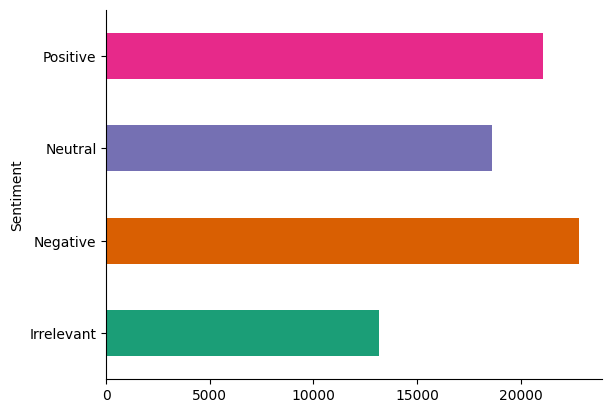

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
tweets.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
tweets[['Sentiment', 'Tweet_Content']]

,Sentiment,Tweet_Content
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
994,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,Positive,Today sucked so it’s time to drink wine n play...
997,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
tweets.columns.tolist()

['TweetID', 'Entity', 'Sentiment', 'Tweet_Content']

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        75680 non-null  int64 
 1   Entity         75680 non-null  object
 2   Sentiment      75680 non-null  object
 3   Tweet_Content  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [ ]:
tweets.isnull().sum()

TweetID            0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64

In [ ]:
tweets.duplicated().sum()

3216

In [ ]:
tweets.dropna(inplace=True)
tweets.drop_duplicates(inplace=True)
print(tweets.isnull().sum())
print("Duplicate Values:",tweets.duplicated().sum())

TweetID          0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64
Duplicate Values: 0


In [ ]:
tweets.drop(columns=['TweetID','Tweet_Content'],inplace=True)
tweets.head()

,Entity,Sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


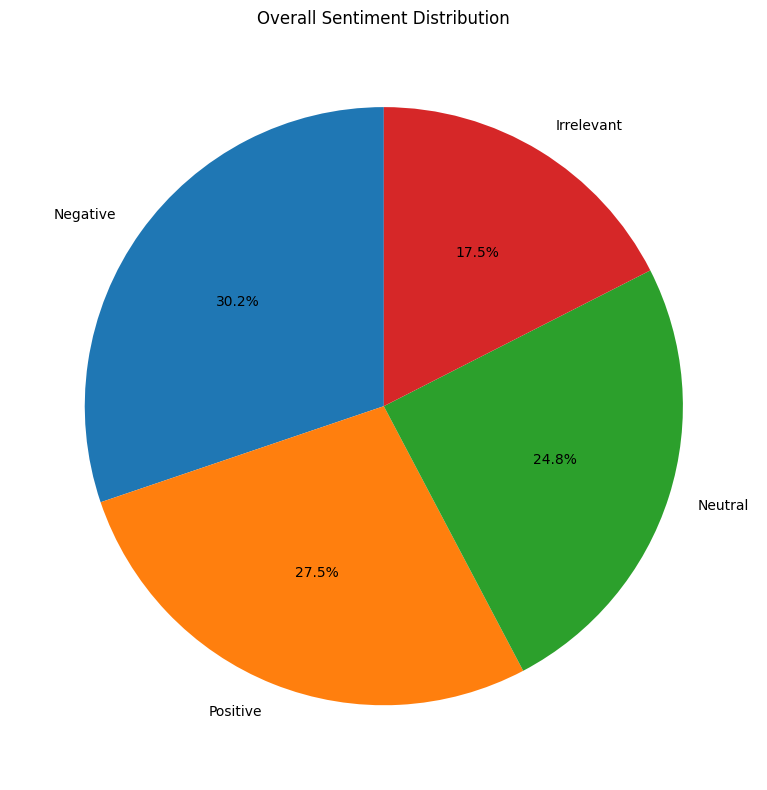

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of each sentiment
sentiment_counts = tweets['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Overall Sentiment Distribution')
_ = plt.tight_layout()

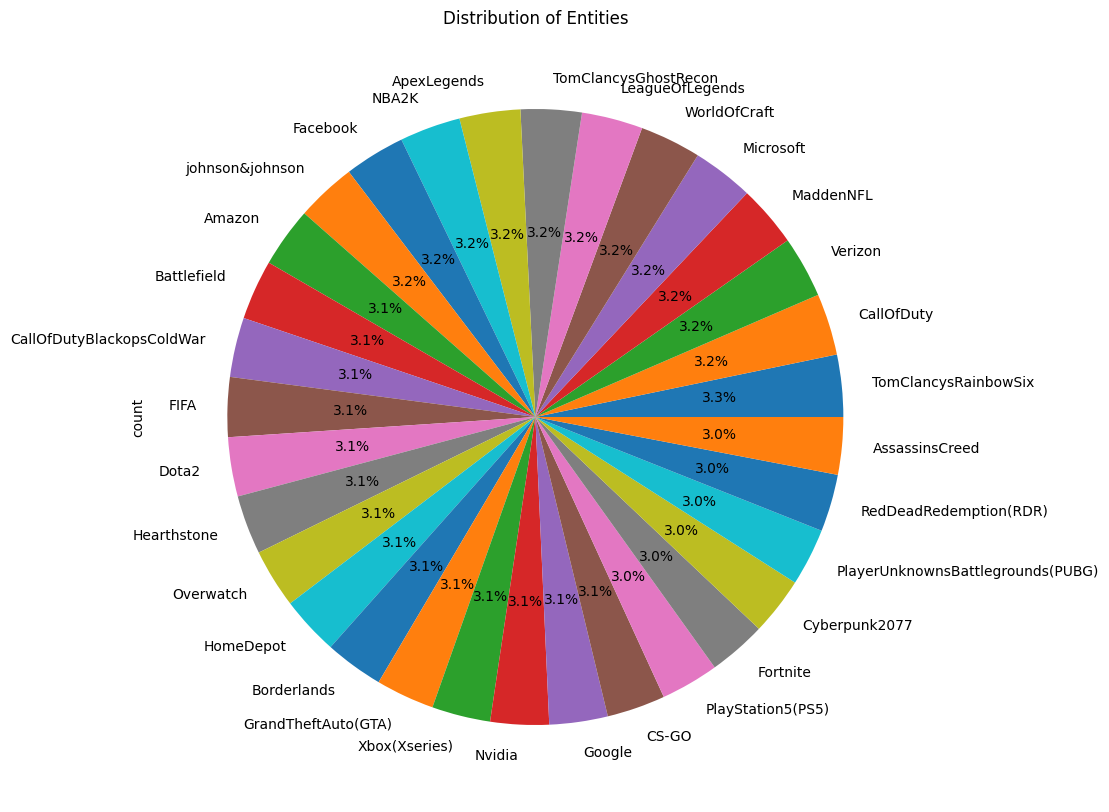

In [ ]:
entity_content=tweets['Entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
plt.title('Distribution of Entities')
plt.show()

<Axes: xlabel='Sentiment'>

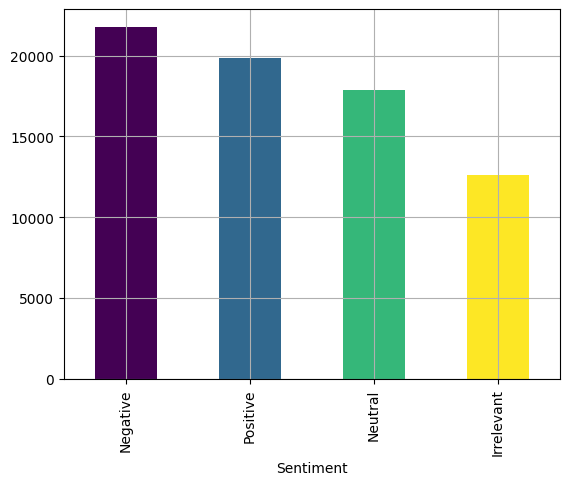

In [ ]:
sentiment_content=tweets['Sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)

<Axes: xlabel='Entity'>

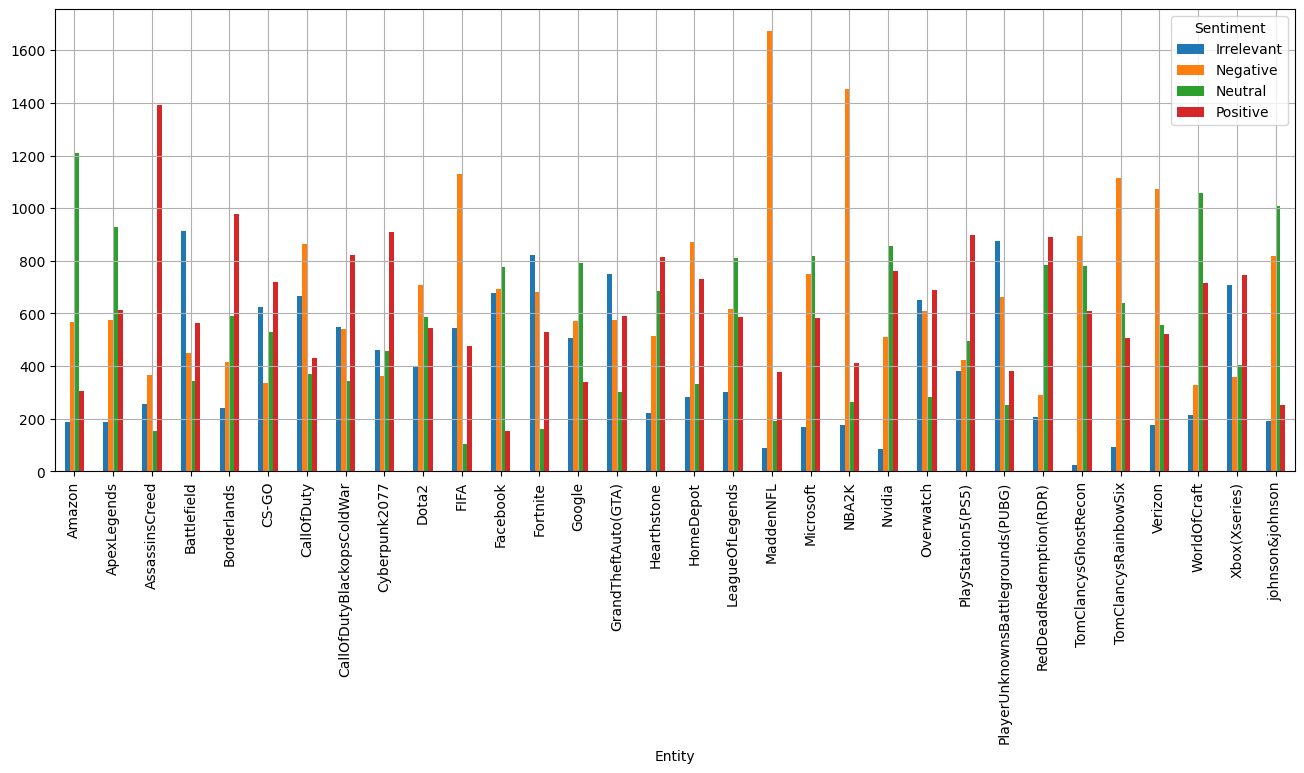

In [ ]:
reactions_entities = pd.crosstab(tweets['Entity'],tweets['Sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)